In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("graduation_rate.csv")

In [3]:
data.head()

,ACT composite score,SAT total score,parental level of education,parental income,high school gpa,college gpa,years to graduate
0,22,1625,high school,40999,3.0,3.1,7
1,29,2090,associate's degree,75817,4.0,3.4,5
2,30,2188,bachelor's degree,82888,4.0,3.9,3
3,33,2151,associate's degree,93518,4.0,3.7,5
4,29,2050,associate's degree,79153,4.0,3.4,6


In [4]:
data.isnull().sum()

ACT composite score            0
SAT total score                0
parental level of education    0
parental income                0
high school gpa                0
college gpa                    0
years to graduate              0
dtype: int64

In [5]:
data.describe()

,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,28.607000,1999.906000,67377.85200,3.707400,3.376500,4.982000
std,2.774211,145.078361,18827.33105,0.287381,0.237179,1.414099
min,20.000000,1598.000000,18906.00000,2.800000,2.600000,3.000000
25%,27.000000,1898.000000,54269.75000,3.500000,3.200000,4.000000
50%,28.500000,2000.000000,67842.50000,3.800000,3.400000,5.000000
75%,31.000000,2099.000000,80465.50000,4.000000,3.500000,6.000000
max,36.000000,2385.000000,124470.00000,4.000000,4.000000,10.000000


In [6]:
data.dtypes

ACT composite score              int64
SAT total score                  int64
parental level of education     object
parental income                  int64
high school gpa                float64
college gpa                    float64
years to graduate                int64
dtype: object

In [7]:
categorical_columns = data.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    print(f"\n{column} - Unique values: {data[column].unique()}")


parental level of education - Unique values: ['high school' "associate's degree" "bachelor's degree" "master's degree"
 'some college' 'some high school']


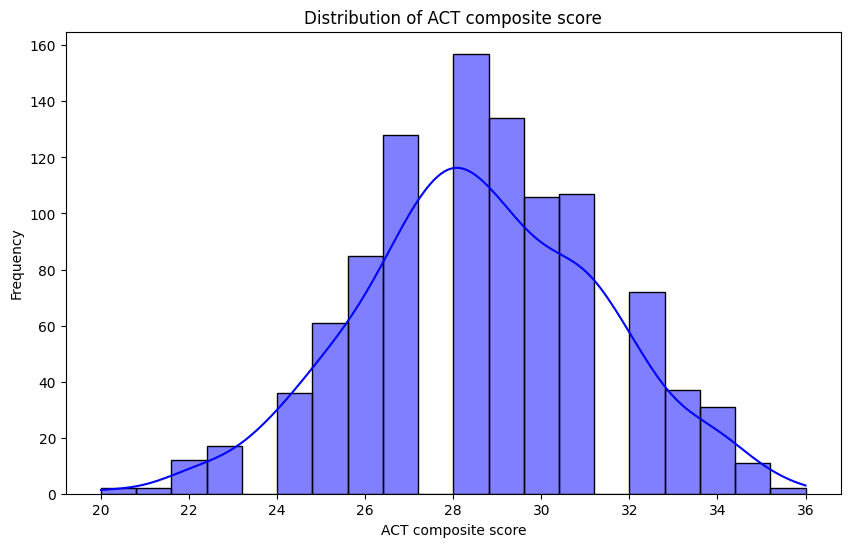

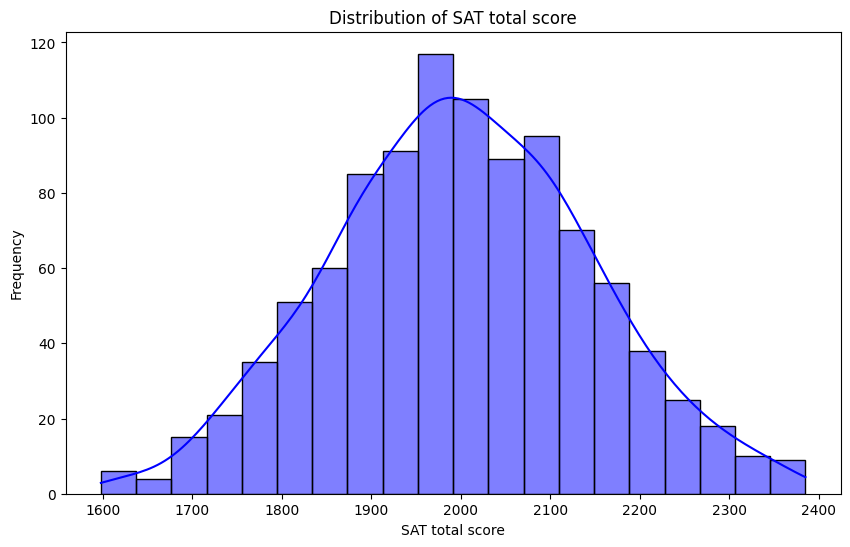

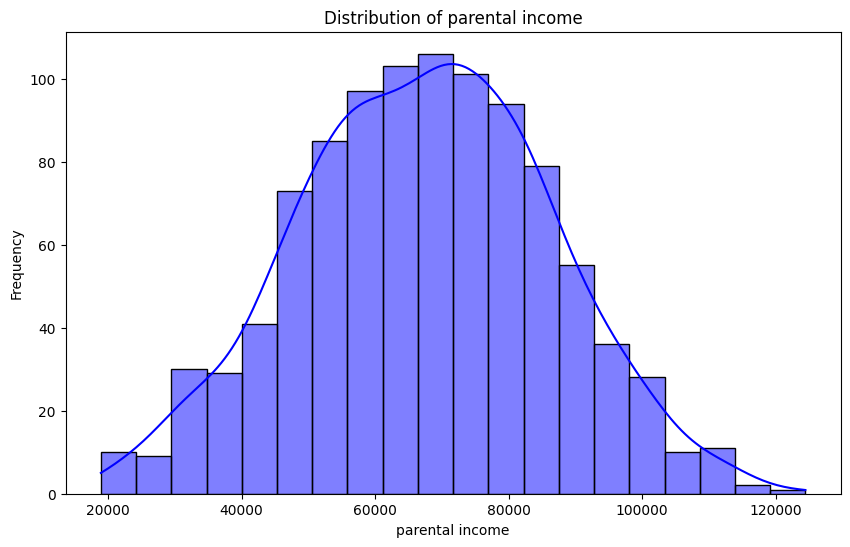

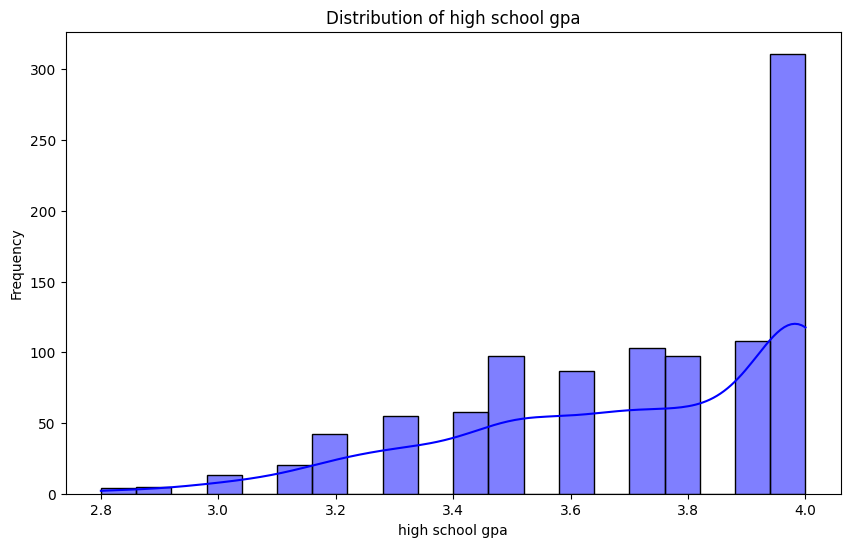

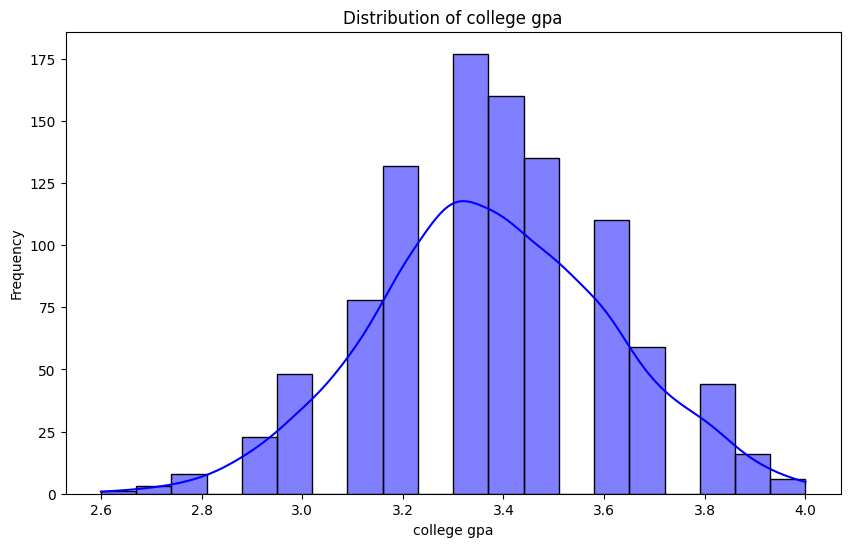

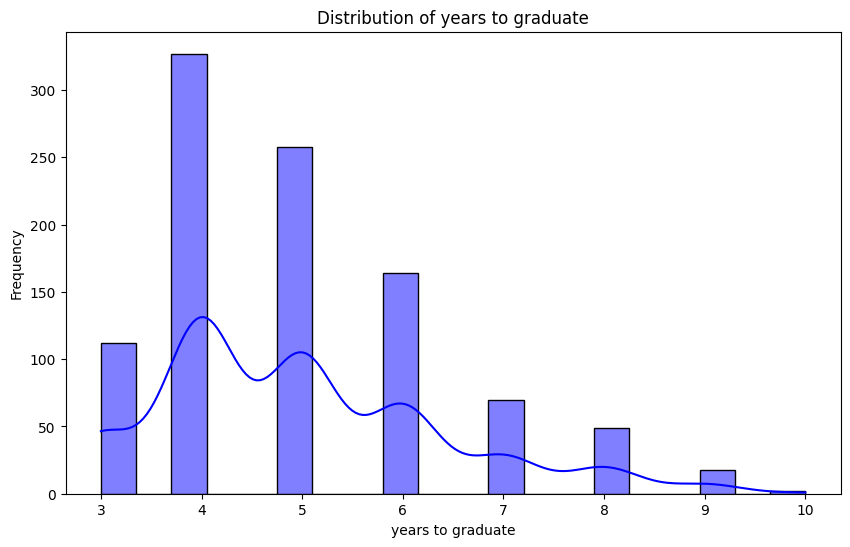

In [8]:
numerical_columns = data.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

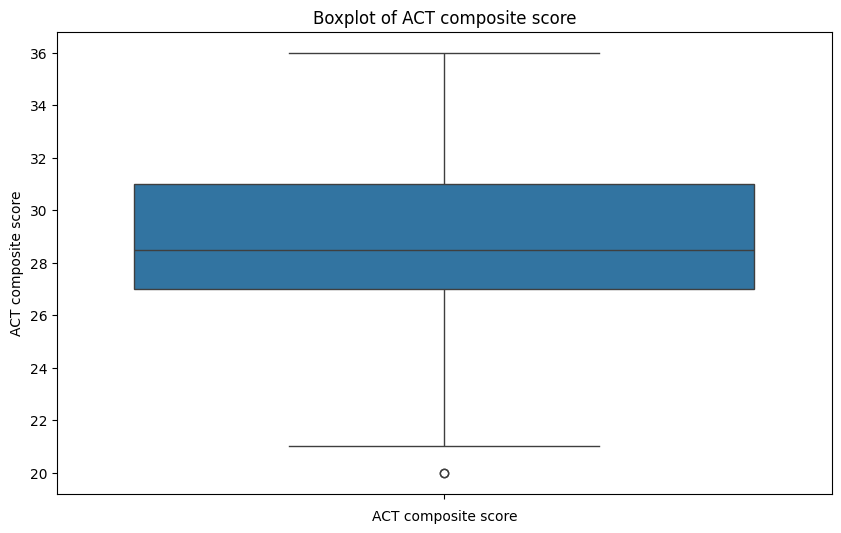

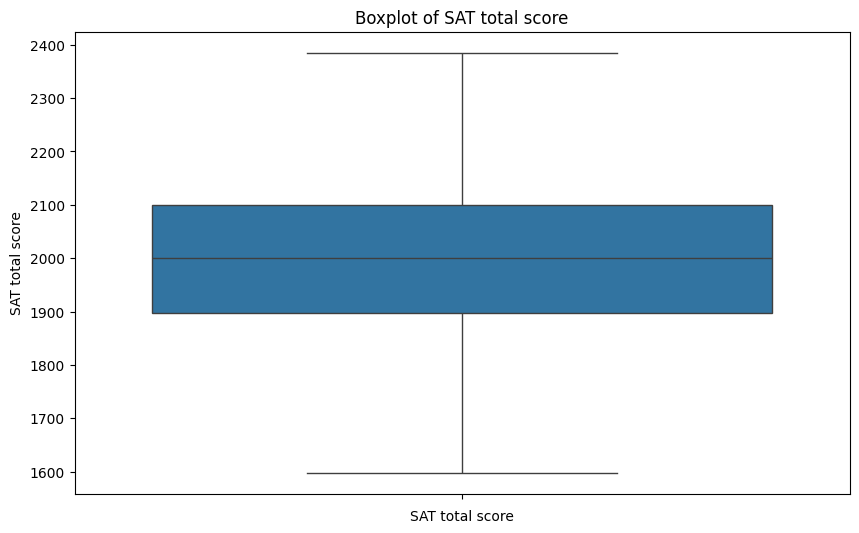

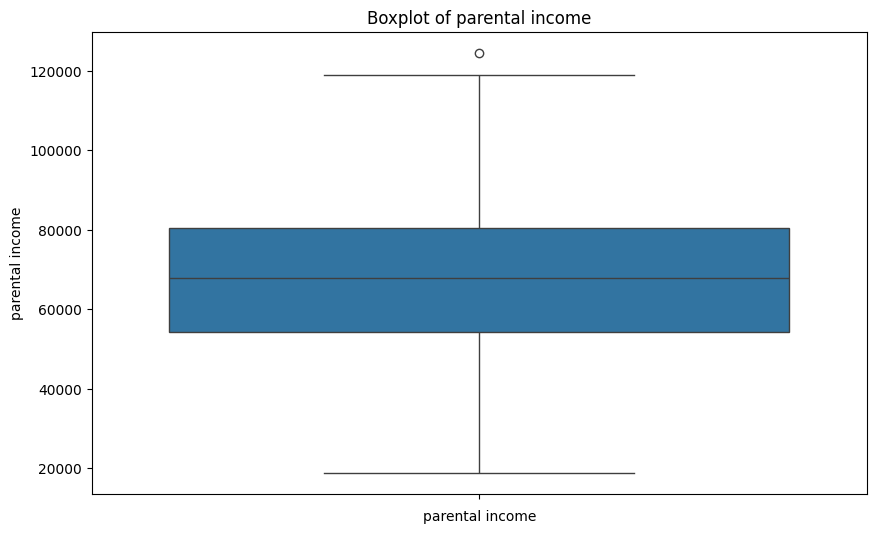

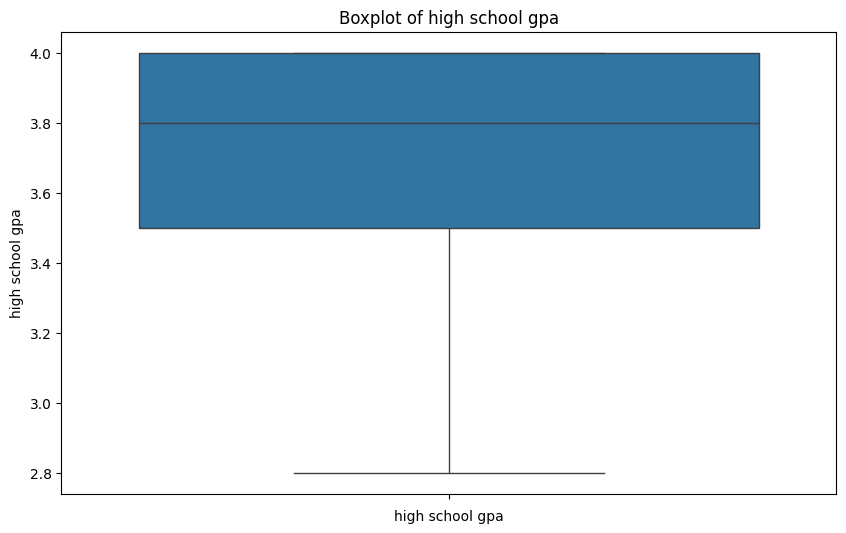

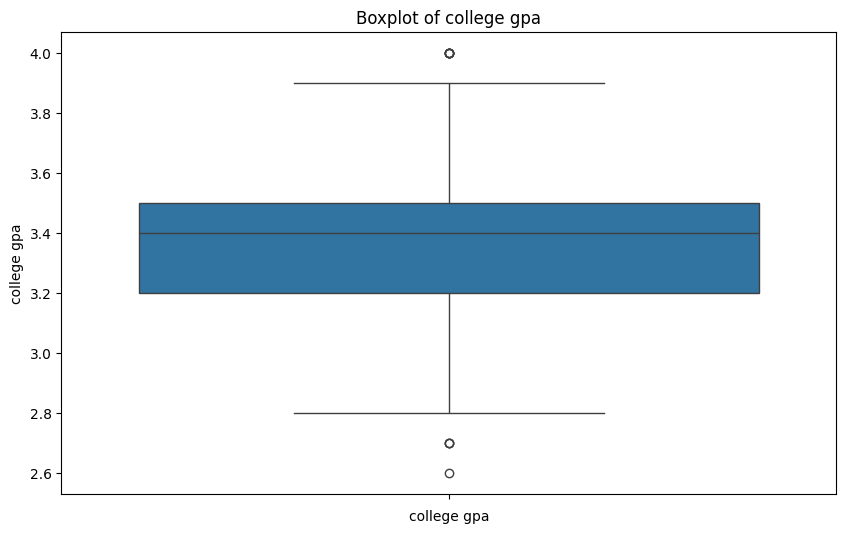

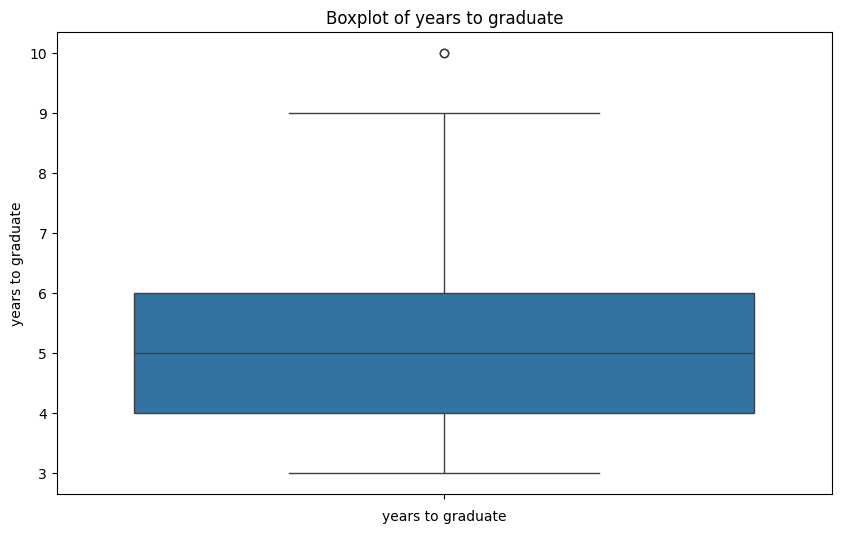

In [9]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

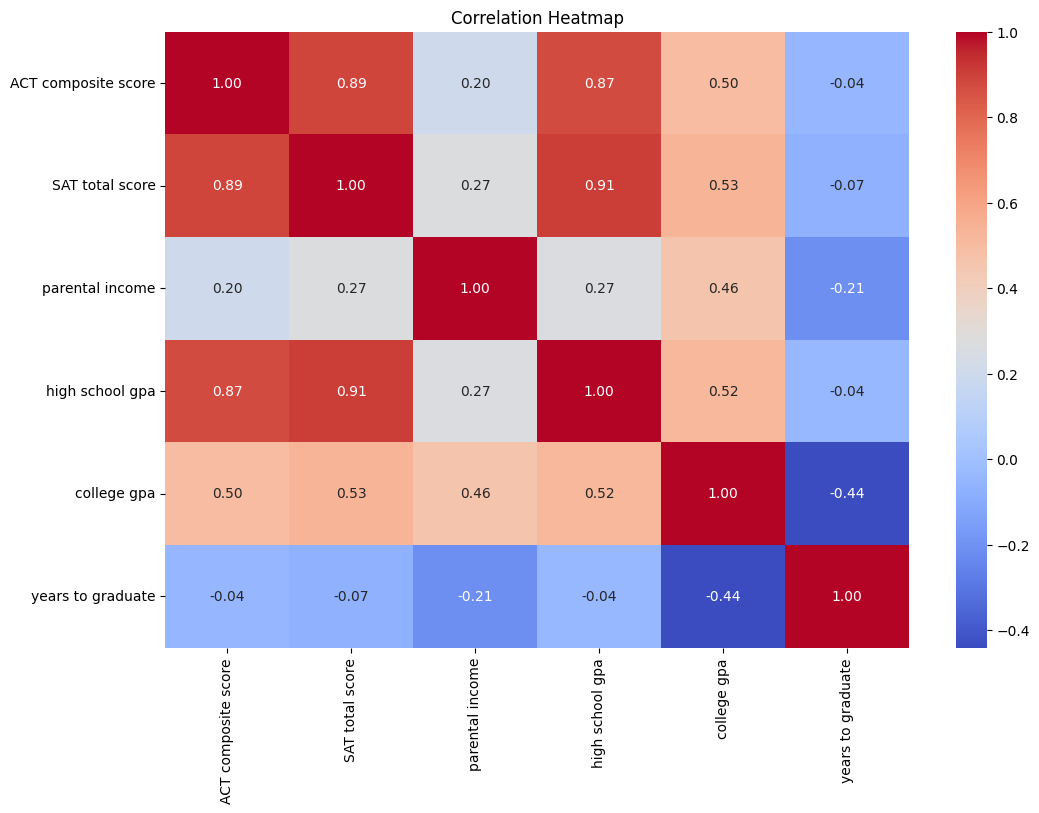

In [10]:
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

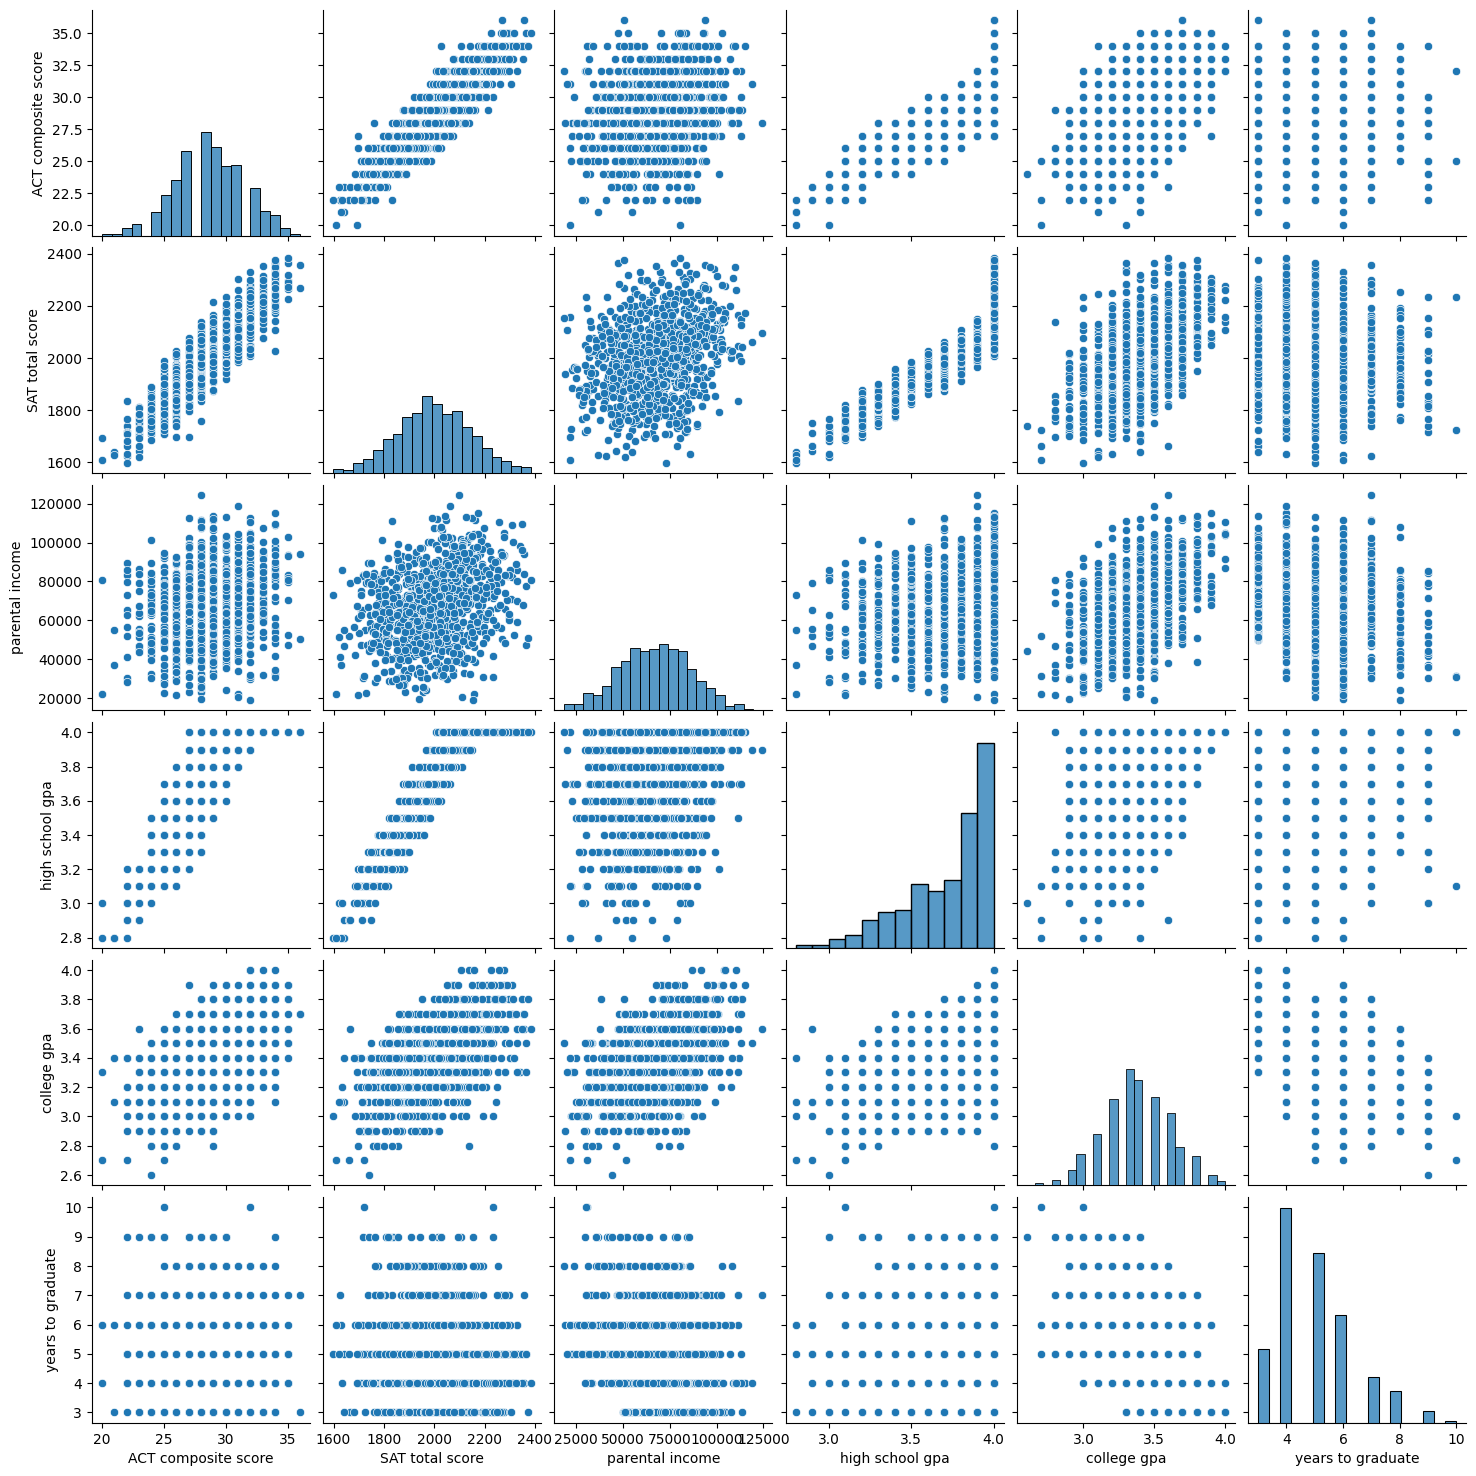

In [11]:
sns.pairplot(data[numerical_columns])
plt.show()


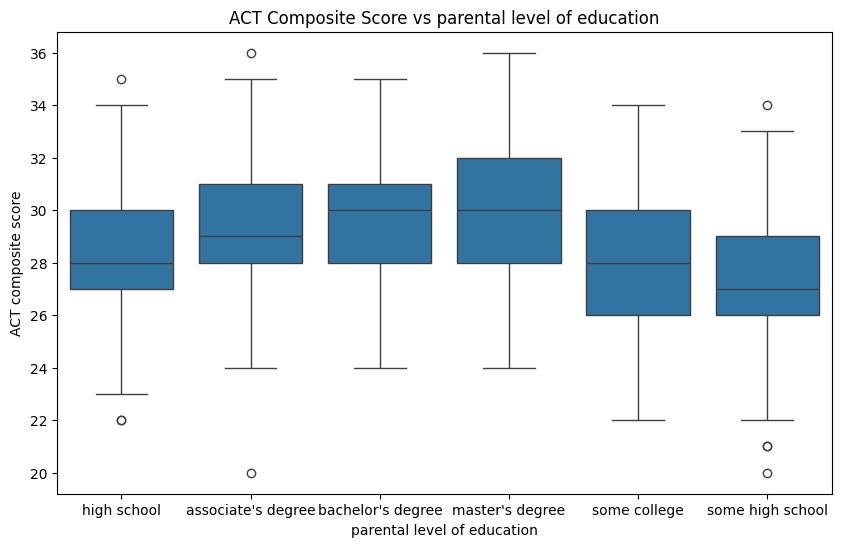

In [12]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='ACT composite score', data=data)
    plt.title(f'ACT Composite Score vs {column}')
    plt.show()

In [13]:
data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

,ACT composite score,SAT total score,parental income,high school gpa,college gpa,years to graduate,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,22,1625,40999,3.0,3.1,7,False,True,False,False,False
1,29,2090,75817,4.0,3.4,5,False,False,False,False,False
2,30,2188,82888,4.0,3.9,3,True,False,False,False,False
3,33,2151,93518,4.0,3.7,5,False,False,False,False,False
4,29,2050,79153,4.0,3.4,6,False,False,False,False,False


In [14]:
X = data_encoded.drop(columns=['ACT composite score'])
y = data_encoded['ACT composite score']


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)


In [19]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Linear Regression Model Evaluation:
Mean Squared Error: 1.2080480295572773
Root Mean Squared Error: 1.0991123825875484
R-squared: 0.8456518771068189


In [20]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients of the model:")
print(coefficients)
pd.DataFrame(


Coefficients of the model:
                                               Coefficient
SAT total score                                   0.011147
parental income                                  -0.000005
high school gpa                                   3.434242
college gpa                                       0.553596
years to graduate                                 0.028434
parental level of education_bachelor's degree    -0.536301
parental level of education_high school           0.439937
parental level of education_master's degree      -0.252675
parental level of education_some college         -0.178228
parental level of education_some high school      0.129207


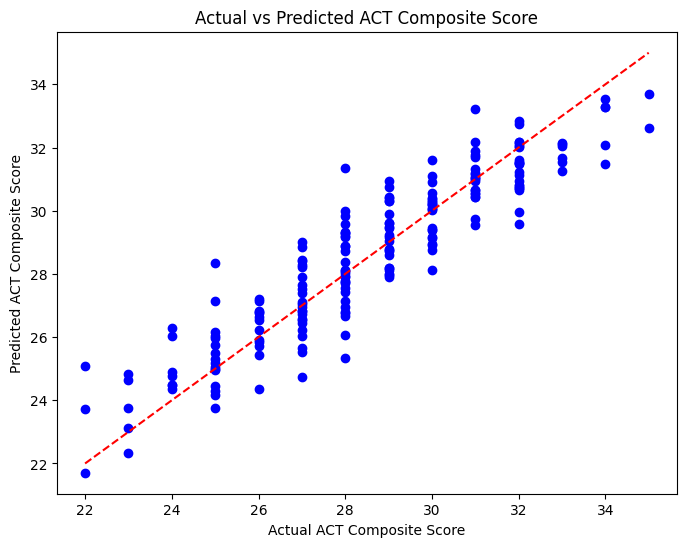

In [21]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted ACT Composite Score')
plt.xlabel('Actual ACT Composite Score')
plt.ylabel('Predicted ACT Composite Score')
plt.show()